In [1]:
# importing libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# import data and add ID column
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
# numerical daat summary
country.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,22.120000,4.486000,28.020000,2548.000000,1.408000,61.880000,1.630000,1146.000000
30%,10.380000,25.460000,5.120000,32.800000,4488.000000,2.326000,66.280000,1.912000,2170.000000
40%,15.280000,29.580000,5.668000,37.280000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
60%,29.160000,40.160000,7.036000,49.160000,14980.000000,6.964000,74.560000,2.670000,7334.000000


In [5]:
# String data summary
country.describe(include='O')

,country
count,167
unique,167
top,Panama
freq,1


In [6]:
# corrections for 2 columns imports and exports. Since it's in percentage let's convert it to decimal
country['exports'] = country.exports/100
country['imports'] = country.imports/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,0.100,7.58,0.449,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.280,6.55,0.486,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.384,4.17,0.314,12900,16.10,76.5,2.89,4460
3,Angola,119.0,0.623,2.85,0.429,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.455,6.03,0.589,19100,1.44,76.8,2.13,12200


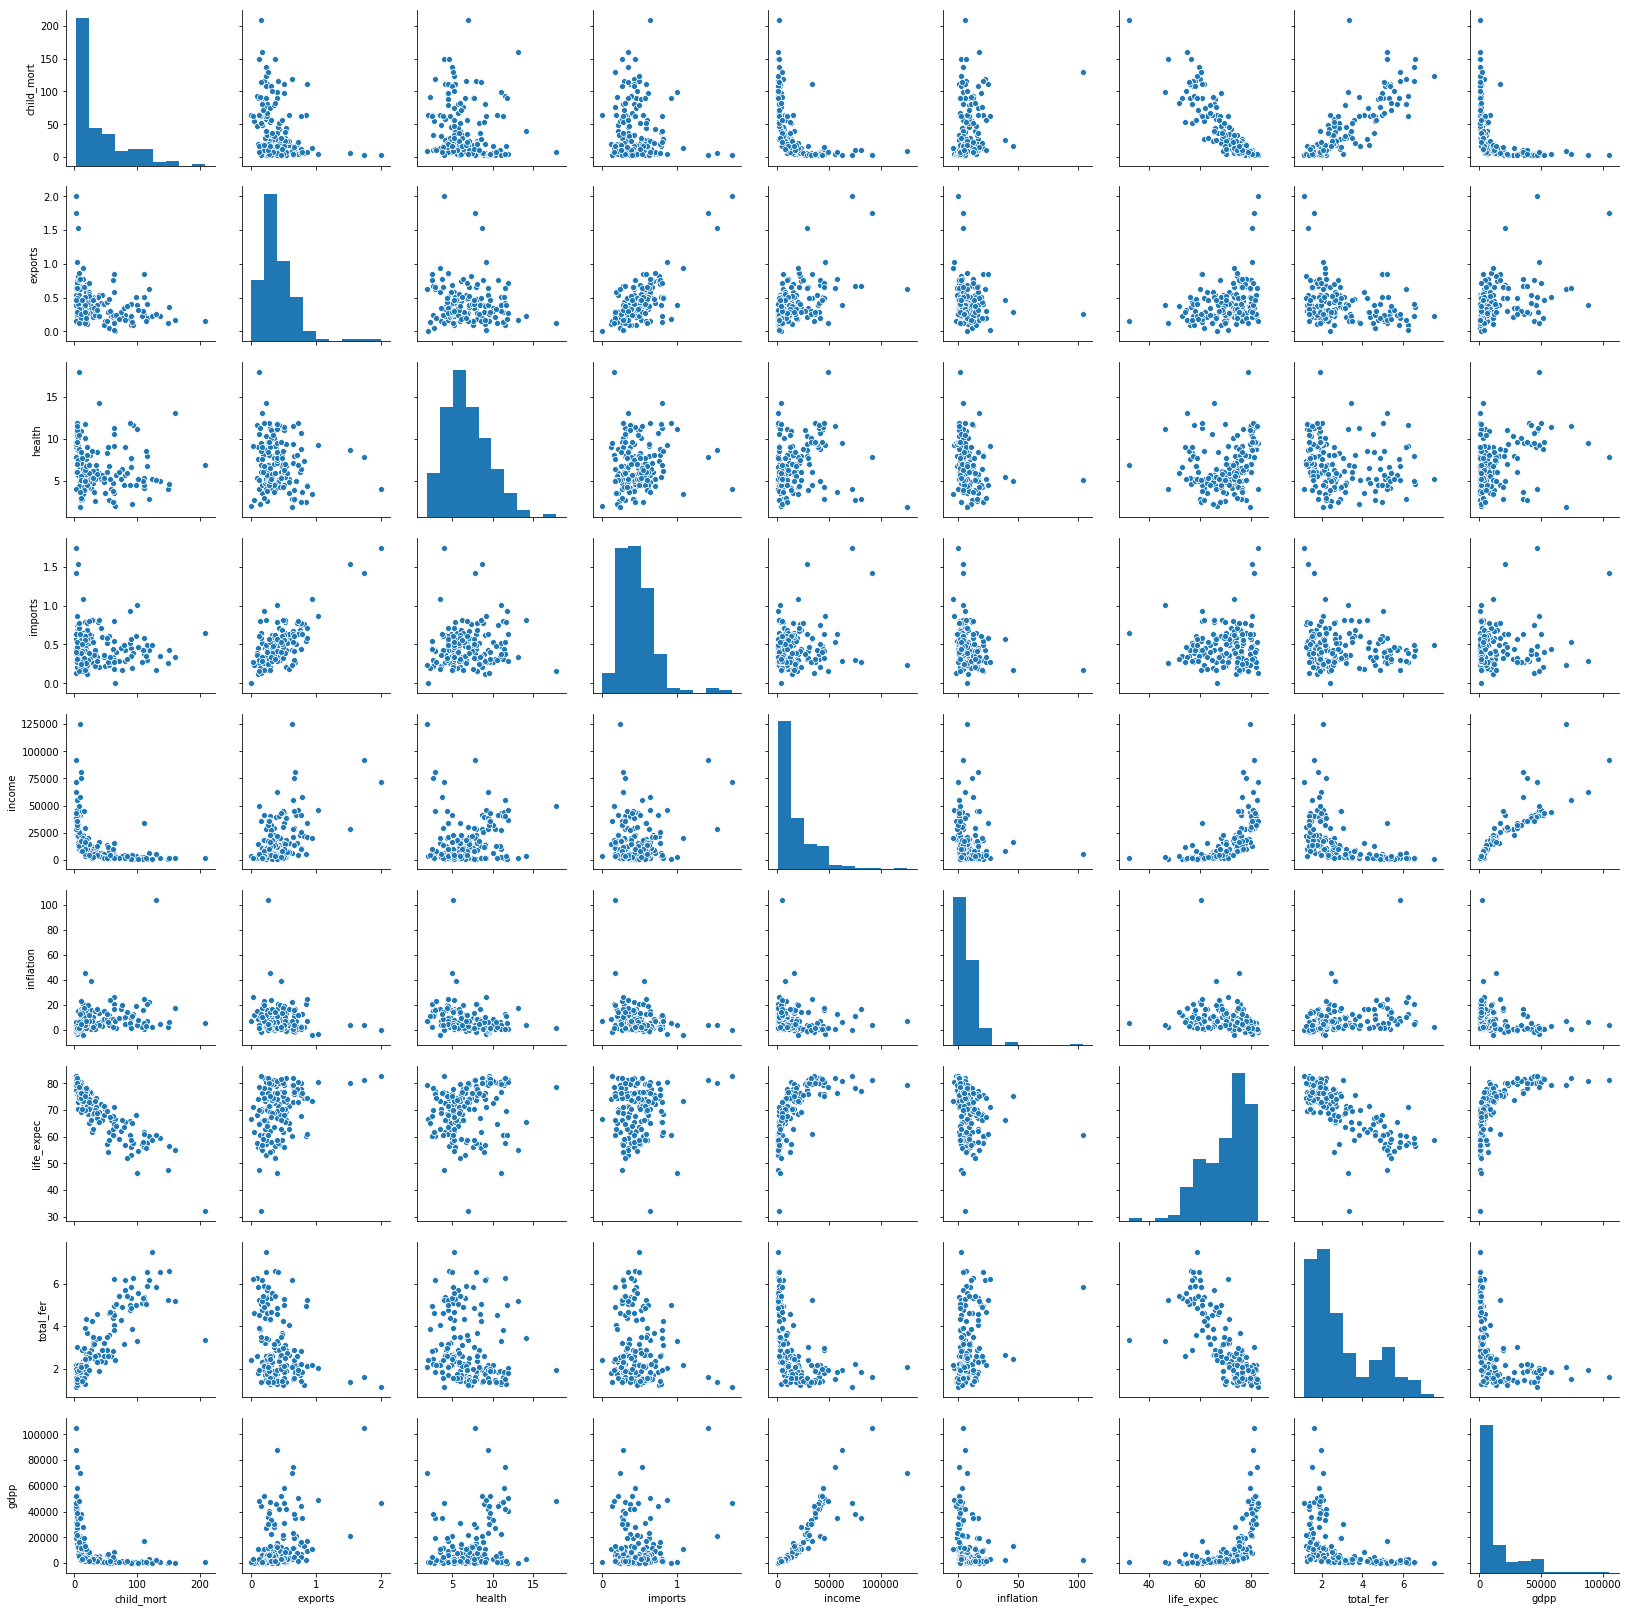

In [7]:
sns.pairplot(country)

### Obeservations from pylot

- For less income high child mortality and total-der can be seen
- As gdpp increases child mortality decreases
- Slight trend can be seen with respect to increase in income leads to increase in life-expec

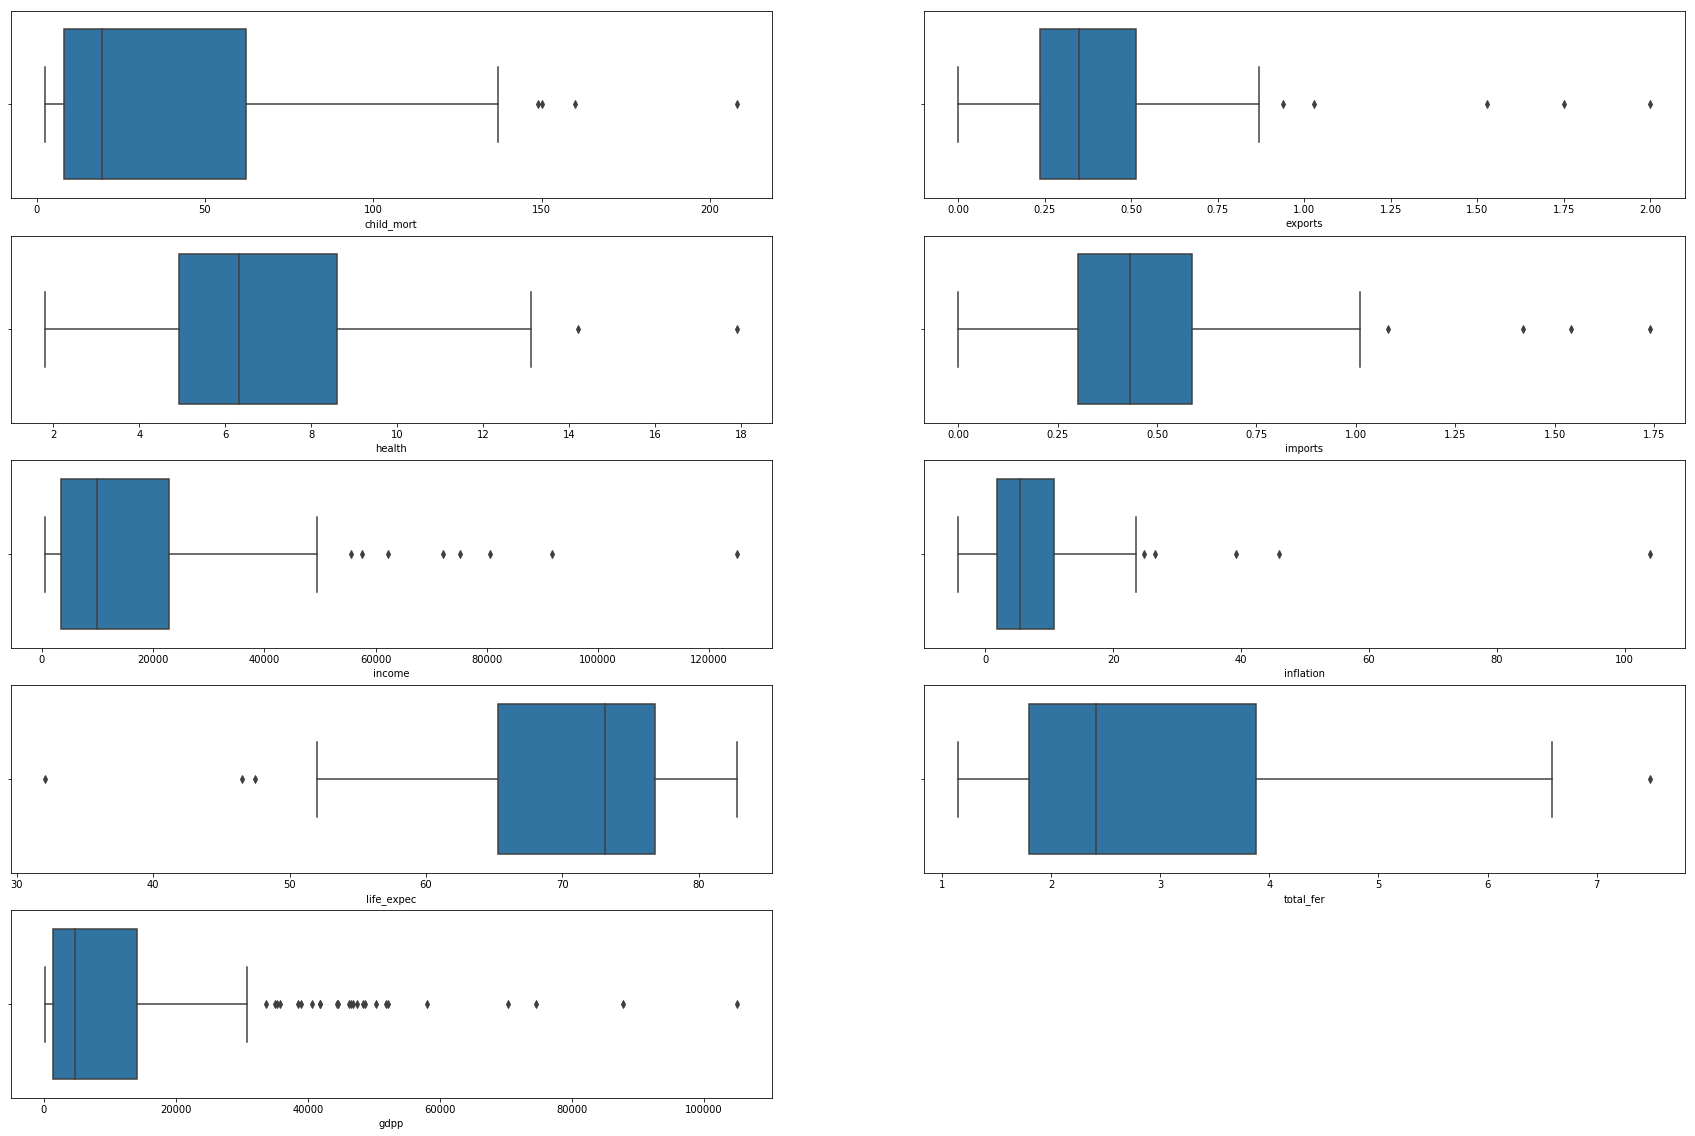

In [8]:
# Check for Outliers 
col = country.columns
plt.figure(figsize=(30,20))
for i in range(1,10):
    plt.subplot(5,2,i)
    sns.boxplot(x = country[col[i]])
#     sns.boxplot(x = country.gdpp)

In [9]:
country[country.income > country.income.quantile(0.97)].sort_values(by='income', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,0.623,1.81,0.238,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,1.750,7.77,1.420,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,0.674,2.84,0.280,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,0.667,2.63,0.304,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,2.000,3.96,1.740,72100,-0.046,82.7,1.15,46600


In [10]:
country[country.gdpp > country.gdpp.quantile(0.97)].sort_values(by='gdpp', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,1.750,7.77,1.420,91700,3.620,81.3,1.63,105000
114,Norway,3.2,0.397,9.48,0.285,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,0.640,11.50,0.533,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,0.623,1.81,0.238,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,0.505,11.40,0.436,44000,3.220,79.5,1.87,58000


In [11]:
country[((country.income - country.income.mean()) / country.income.std()).abs() > 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,0.674,2.84,0.280,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,0.667,2.63,0.304,75200,11.20,78.2,2.21,38500
91,Luxembourg,2.8,1.750,7.77,1.420,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,0.623,1.81,0.238,125000,6.98,79.5,2.07,70300


In [12]:
country[((country.gdpp - country.gdpp.mean()) / country.gdpp.std()).abs() > 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,1.750,7.77,1.420,91700,3.620,81.3,1.63,105000
114,Norway,3.2,0.397,9.48,0.285,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,0.623,1.81,0.238,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,0.640,11.50,0.533,55500,0.317,82.2,1.52,74600


### Analysis of Outliers
Lets' Check some methods to remove outliers and see the effect of this in data and take decision whether to remove outliers or keep them in the data

In [13]:
# Remove outliers
country_cleaned = country[~(((country.income - country.income.mean()) / country.income.std()).abs() > 3)]

In [14]:
country_cleaned.shape

(163, 10)

In [15]:
country_cleaned.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,0.100,7.58,0.449,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.280,6.55,0.486,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.384,4.17,0.314,12900,16.10,76.5,2.89,4460
3,Angola,119.0,0.623,2.85,0.429,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.455,6.03,0.589,19100,1.44,76.8,2.13,12200


In [16]:
country_cleaned.columns.values

array(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)

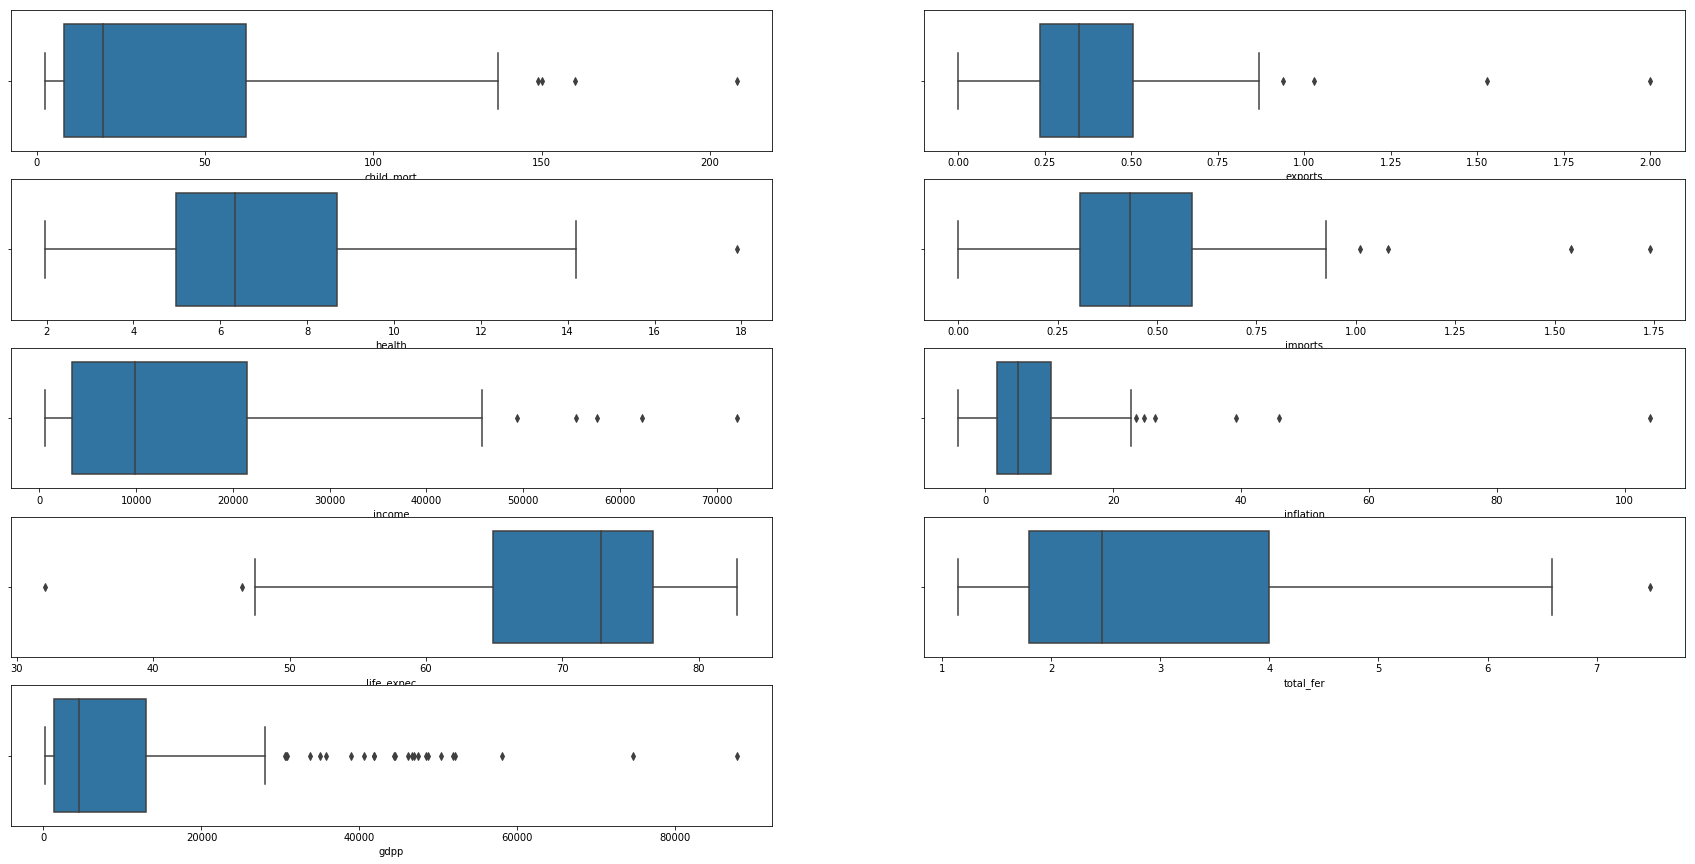

In [17]:
# Check outliers
var = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(30,15))
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1], data= country_cleaned)

In [18]:
out = country.gdpp.quantile(0.75)

In [19]:
out

14050.0

In [20]:
country[country.gdpp >= out].sort_values(['gdpp','income'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
51,Estonia,4.5,0.751,6.03,0.687,22700,1.740,76.0,1.72,14600
13,Barbados,14.2,0.395,7.97,0.487,15300,0.321,76.7,1.78,16000
134,Slovak Republic,7.0,0.763,8.79,0.778,25200,0.485,75.5,1.43,16600
49,Equatorial Guinea,111.0,0.858,4.48,0.589,33700,24.900,60.9,5.21,17100
115,Oman,11.7,0.657,2.77,0.412,45300,15.600,76.1,2.90,19300
128,Saudi Arabia,15.7,0.496,4.29,0.330,45400,17.200,75.1,2.96,19300
43,Czech Republic,3.4,0.660,7.88,0.629,28300,-1.430,77.5,1.51,19800
11,Bahrain,8.6,0.695,4.97,0.509,41100,7.440,76.0,2.16,20700
98,Malta,6.8,1.530,8.65,1.540,28300,3.830,80.3,1.36,21100
138,South Korea,4.1,0.494,6.93,0.462,30400,3.160,80.1,1.23,22100


In [21]:
country_check = country[country.gdpp <= out]

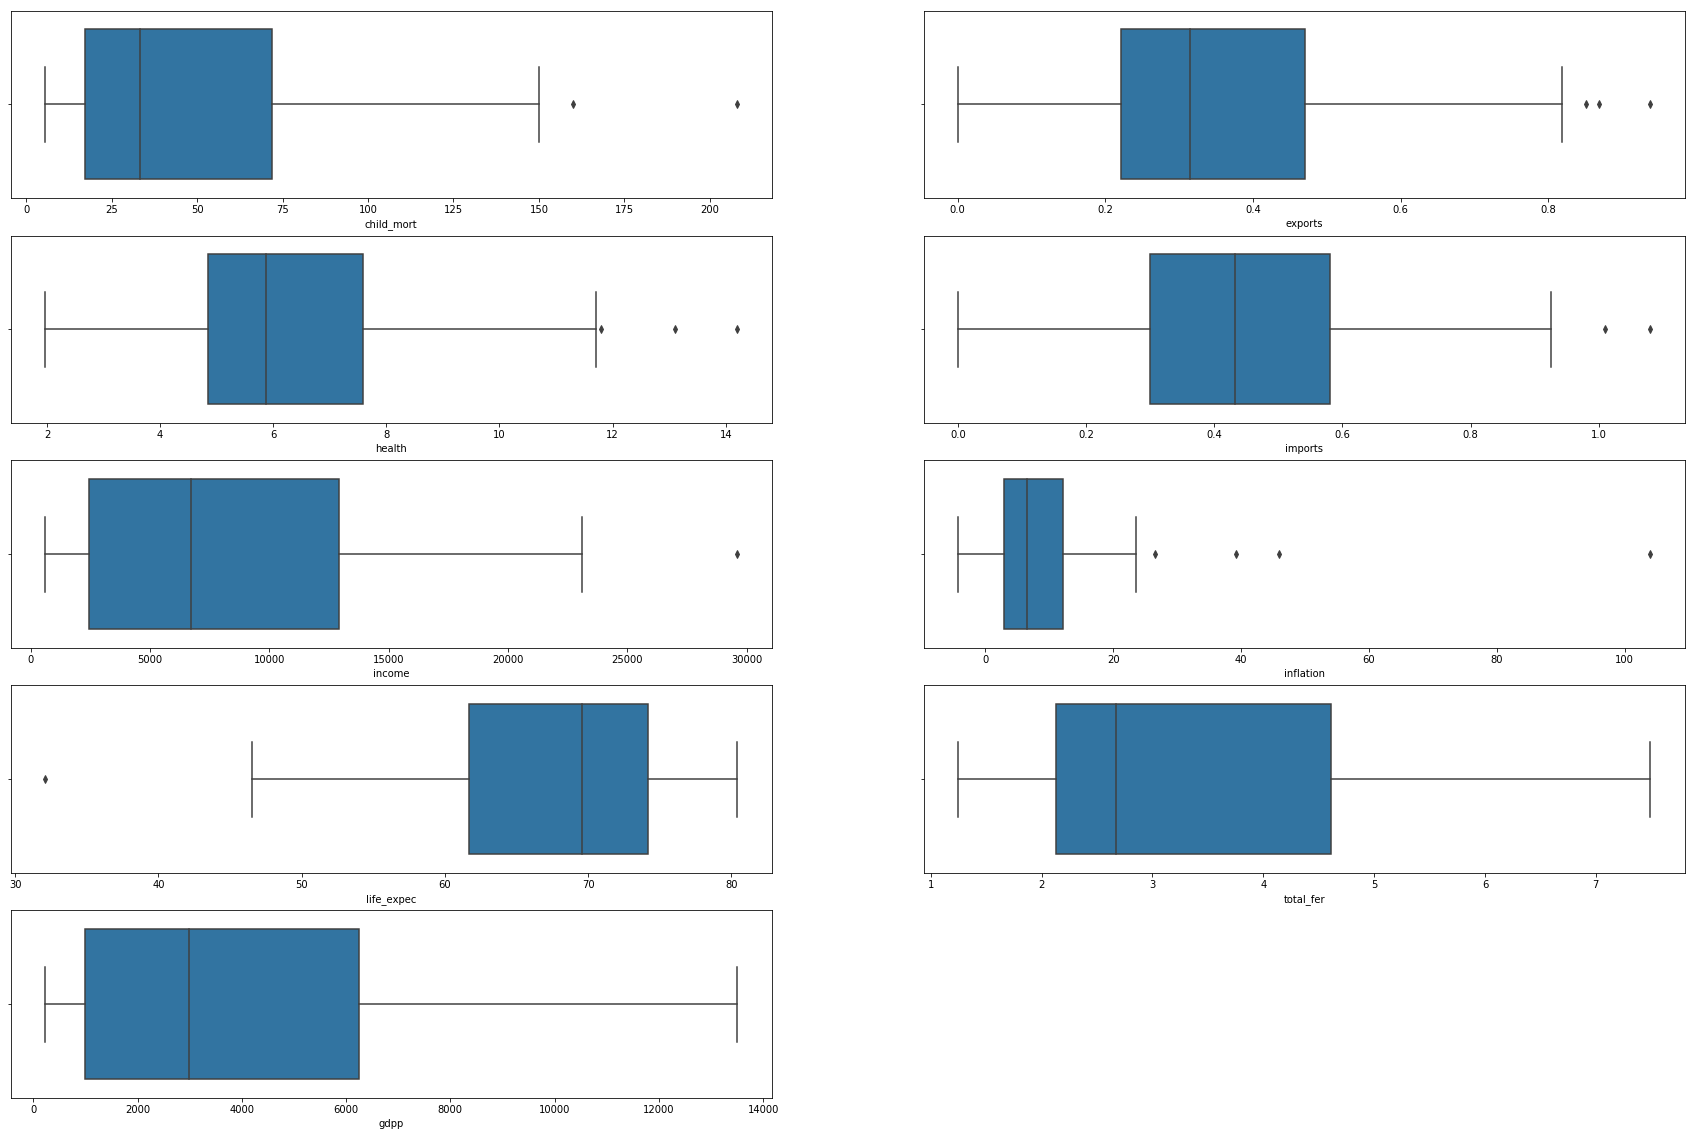

In [22]:
# Check outliers
var = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(30,20))
for i in enumerate(var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1], data= country_check)

### Decision on Outliers
Base on the above analysis we can see that there are outliers in gdpp and income which are crucial variables for this analysis.
Since the data has lot of outliers and removing outliers cost us losing majority of data, it's better to keep it as it is and the cluster will take care of these outliers

### Let's perform PCA

In [23]:
country_pca = country.drop(['country'], axis=1)
country_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,0.100,7.58,0.449,1610,9.44,56.2,5.82,553
1,16.6,0.280,6.55,0.486,9930,4.49,76.3,1.65,4090
2,27.3,0.384,4.17,0.314,12900,16.10,76.5,2.89,4460
3,119.0,0.623,2.85,0.429,5900,22.40,60.1,6.16,3530
4,10.3,0.455,6.03,0.589,19100,1.44,76.8,2.13,12200


In [24]:
scaler = StandardScaler()
country_pca = scaler.fit_transform(country_pca)

C:\Users\s0d01qd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\s0d01qd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(country_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [26]:
pca.components_[:5,:5]

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ]])

In [27]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative Variance')

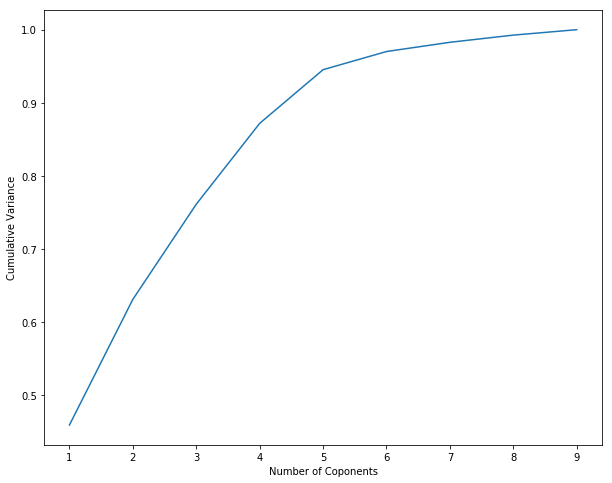

In [28]:
#Plotting the scree plot
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

### Run PCA with proper number of clusters

In [29]:
from sklearn.decomposition import IncrementalPCA
pca_i = IncrementalPCA(n_components=5)

In [30]:
# Tranform the data
pca_df = pca_i.fit_transform(country_pca)
pca_df.shape

(167, 5)

In [31]:
# create df
pc = pd.DataFrame(pca_df, columns = ['PC1','PC2','PC3','PC4','PC5'])
pc.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


### Clustering

In [32]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(pc)

0.8390009662722813

### K- Means Clustering

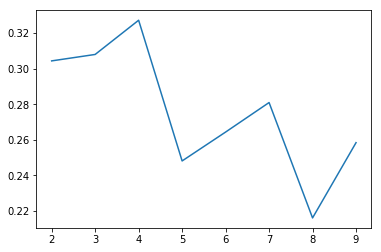

In [34]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(pc)
    ss.append([k, silhouette_score(pc, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

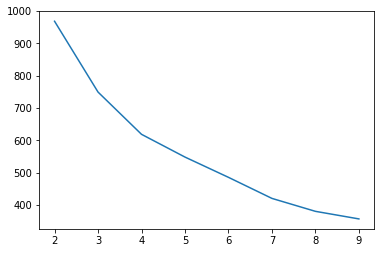

In [35]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(pc)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [36]:
#Let's perform K means using K=4
model_kmean = KMeans(n_clusters = 4, random_state = 42)
model_kmean.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pc.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['PC1','PC2','PC3','PC4','PC5', 'ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3


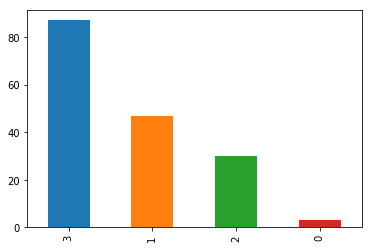

In [38]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')

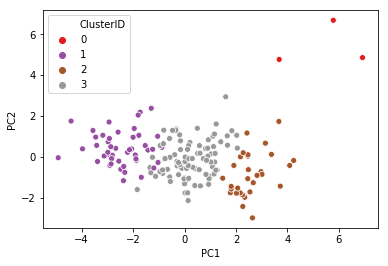

In [39]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')

## Cluster Profiling

In [40]:
# Let's merge the original data with the data(ClusterID)
country_final = pd.concat([country, dat_km['ClusterID']], axis=1)

In [41]:
# Let's drop PCs from the data
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,0.100,7.58,0.449,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,0.280,6.55,0.486,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,0.384,4.17,0.314,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,0.623,2.85,0.429,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,0.455,6.03,0.589,19100,1.44,76.8,2.13,12200,3


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [42]:
country_final.groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,4.133333,1.760000,6.793333,1.566667,64033.333333,2.468000,81.433333,1.380000,57566.666667
1,92.961702,0.291513,6.388511,0.423234,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,0.458267,9.168667,0.397367,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,21.389655,0.412907,6.235862,0.480387,12968.620690,7.413460,72.935632,2.286552,6919.103448


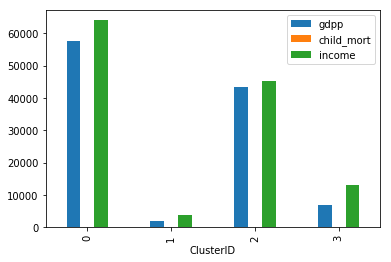

In [43]:
country_final[['gdpp', 'child_mort','income','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

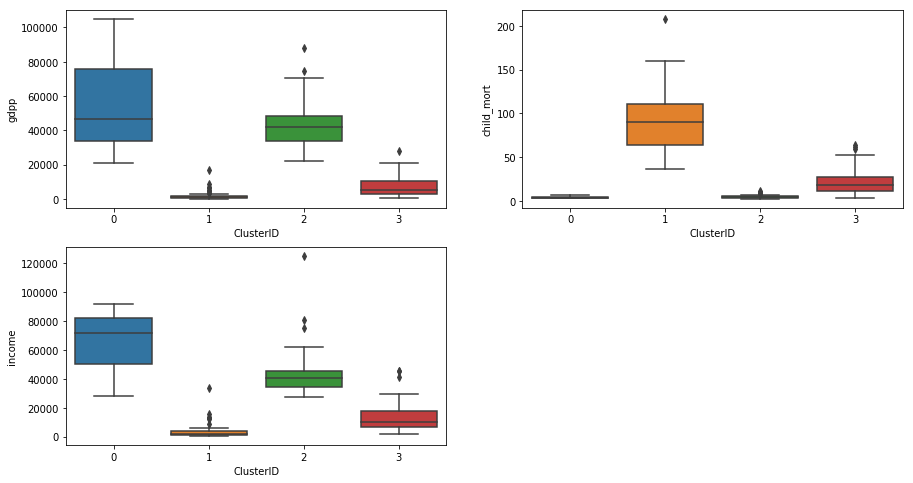

In [44]:
# plots
plt.figure(figsize = (15,8))
var = ['gdpp', 'child_mort','income']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = country_final)

## Finding the observations that belong to certain cluster

Since we need to find countries which need help it's better to find countries where income and gdpp is low and child mortality is very high. Based on the above Box Plot we see this behaviour in cluster 1

In [45]:
country_final.ClusterID.value_counts()

3    87
1    47
2    30
0     3
Name: ClusterID, dtype: int64

In [46]:
#Let's use the concept of binning
# Find the counteries

country_final[country_final['ClusterID'] ==1][['country','gdpp','income','child_mort']].sort_values(['income','gdpp','child_mort'],ascending=[True,True,False]).head(10)

,country,gdpp,income,child_mort
37,"Congo, Dem. Rep.",334,609,116.0
88,Liberia,327,700,89.3
26,Burundi,231,764,93.6
112,Niger,348,814,123.0
31,Central African Republic,446,888,149.0
106,Mozambique,419,918,101.0
94,Malawi,459,1030,90.5
63,Guinea,648,1190,109.0
150,Togo,488,1210,90.3
132,Sierra Leone,399,1220,160.0


## Heirarchial Clustering

In [47]:
pc.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


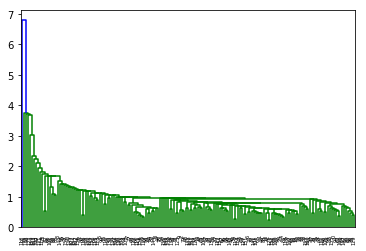

In [48]:
# single linkage
mergings = linkage(pc, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

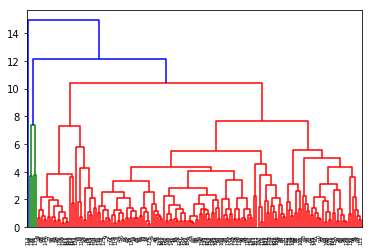

In [49]:
# complete linkage
mergings = linkage(pc, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [50]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
# assign cluster labels
country_final['cluster_labels'] = cluster_labels
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,0.100,7.58,0.449,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,0.280,6.55,0.486,9930,4.49,76.3,1.65,4090,3,0
2,Algeria,27.3,0.384,4.17,0.314,12900,16.10,76.5,2.89,4460,3,0
3,Angola,119.0,0.623,2.85,0.429,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,0.455,6.03,0.589,19100,1.44,76.8,2.13,12200,3,0


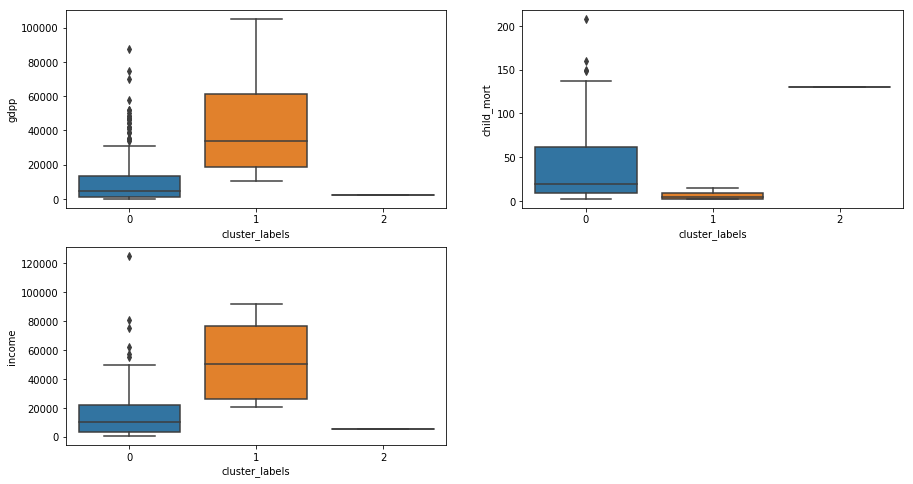

In [52]:
# plots
plt.figure(figsize = (15,8))
var = ['gdpp', 'child_mort','income']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_labels', y = i[1], data = country_final)

In [53]:
country_final.cluster_labels.value_counts()

0    162
1      4
2      1
Name: cluster_labels, dtype: int64

In [54]:
country_final[country_final.cluster_labels==0][['country','gdpp','income','child_mort']].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(10)

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
88,Liberia,327,700,89.3
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
93,Madagascar,413,1390,62.2
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
50,Eritrea,482,1420,55.2


### Conclusion

Based on K-means and Heirarchial clustering methods we are able to find out countries that needs help.
- Congo, Dem. Rep.
- Liberia
- Burundi
- Niger
- Central African Republic
- Sierra Leone
- Mozambique
- Malawi
- Guinea